# **Author : Rohit Sharma**
## Task 2: Prediction using Unsupervised Machine Learning
### GRIP The Sparks Foundation
*About: In this Task we are asked to use K-Mean Clustringdataset, predict the optimum number of clusters and represent it visually.*



**Package needed : Sikit learn, Numpy, Pandas, matplotlib and liner regression**

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

### Step : 1 - Reading data form the Source

In [44]:
ds = pd.read_csv('Iris.csv')

In [45]:
print(ds.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [48]:
print(ds.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [46]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [47]:
print(ds.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [38]:
print(ds.Species.nunique())
print(ds.Species.value_counts())

3
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


### Step : 2 - Finding Optimum number of clusters for K-Means clustring

In [49]:
# Finding the optimum number of clusters using k-means
x = ds.iloc[:, [0,1,2,3]].values
clust = range(1,11)
wcss = []
for i in clust:
    kmean = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(x)
    #appending the within class 
    wcss.append(kmean.inertia_)
    print("K: ",i ,"WCSS:",kmean.inertia_)

K:  1 WCSS: 281831.54466666665
K:  2 WCSS: 70581.3808
K:  3 WCSS: 31320.711199999998
K:  4 WCSS: 17762.657226173542
K:  5 WCSS: 11423.238080088988
K:  6 WCSS: 7909.530673076923
K:  7 WCSS: 5881.448116883117
K:  8 WCSS: 4562.7800793650795
K:  9 WCSS: 3579.72056127451
K:  10 WCSS: 2968.491432665374


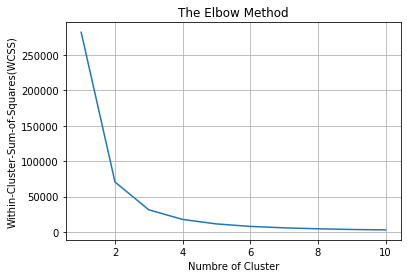

In [42]:
#Plotting the results onto a line graph
plt.plot(clust,wcss)
plt.grid()
plt.title("The Elbow Method")
plt.xlabel("Numbre of Cluster")
plt.ylabel("Within-Cluster-Sum-of-Squares(WCSS)")
plt.show()

t

### Step : 4 - Model Training 

In [31]:
k_mean = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmean = k_mean.fit_predict(x)

### Step : 5 - Data Visualizing of the Model Cluster 

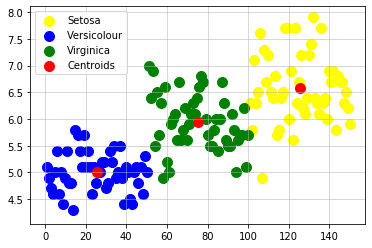

In [50]:
plt.grid(linewidth='0.5')
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='Yellow',label='Setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='Red',label='Centroids')
plt.legend()
plt.show()